# **ML code written on Oct, 25, 2022** # 

*wawfmp15222*

resourses ->  https://www.kaggle.com/code/mjamilmoughal/k-nearest-neighbor-classifier-to-predict-fruits/notebook  ,



the dataset is from -> https://www.kaggle.com/code/mjamilmoughal/k-nearest-neighbor-classifier-to-predict-fruits/data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [8]:
fruits = pd.read_table("../input/fruits-with-colors-dataset/fruit_data_with_colors.txt")
# because of dataset is in .txt form not in csv , so use read_table to read it.

# **Basic EDA** #

In [9]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [10]:
fruits.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [11]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [12]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [13]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [14]:
fruits.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

In [15]:
fruits.shape

(59, 7)

we want to know how many rows are with 'unknown' in the column : fruit_subtype ?

In [16]:
fruits['fruit_subtype'].value_counts()

turkey_navel        10
unknown             10
cripps_pink          6
selected_seconds     6
spanish_belsan       6
mandarin             5
braeburn             5
golden_delicious     5
granny_smith         3
spanish_jumbo        3
Name: fruit_subtype, dtype: int64

so there is 10 unknown

In [27]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# **visualization** # 

In [28]:
corr = fruits.corr()
corr

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


<AxesSubplot:>

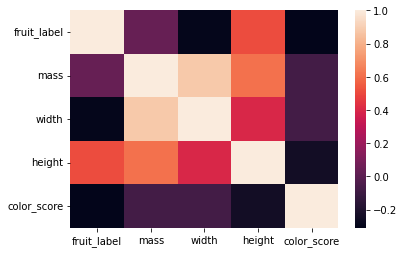

In [29]:
sns.heatmap(corr)
#for all featuers

<AxesSubplot:>

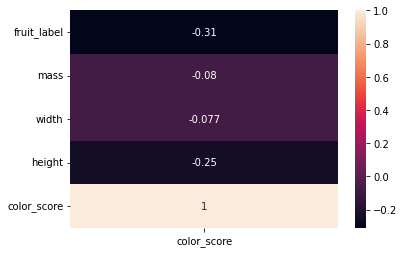

In [30]:
#Get Correlation to Target Variable
corr = fruits.corr()[['color_score']]
sns.heatmap(corr, annot=True)

the value of the correlation coefficient can take any values from -1 to 1.

If the value is 1, it is said to be a positive correlation between two variables. ...

If the value is -1, it is said to be a negative correlation between the two variables. ...

If the value is 0, there is no correlation between the two variables.

the value of corr between (fruit_label, height) with the target variable (color_score) is more

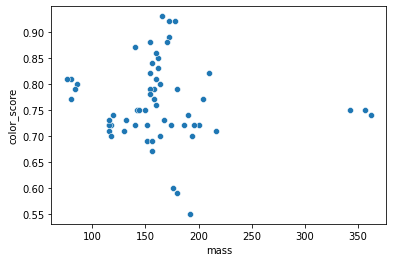

In [31]:
sns.scatterplot(x=fruits['mass'], y=fruits['color_score']);


do the same thing using plt 

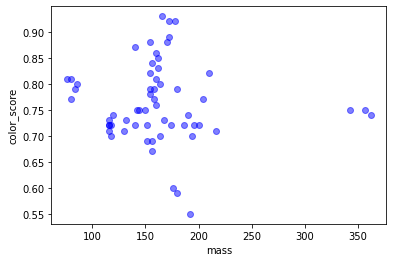

In [34]:
plt.scatter(fruits['mass'], fruits['color_score'], color='blue', alpha=0.5)
plt.xlabel('mass')
plt.ylabel('color_score')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='color_score', ylabel='Density'>

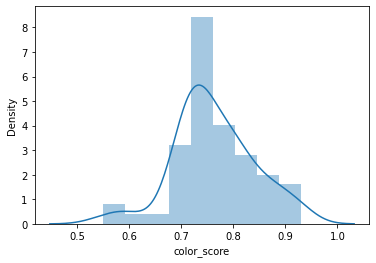

In [37]:
sns.distplot(fruits['color_score'])

In [38]:
# skewness of color score
fruits['color_score'].skew()

-0.02476290670874745

 When the value of the skewness is negative/positive 
 
 the tail of the distribution is longer towards the left/right hand side of the curve.
 If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
 
 If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

 If the skewness is less than -1 (negative , tail longer to left)

 or greater than 1(positive, tail longer to the right), the data are highly skewed

our shape is  moderately skewed

# **train/test split** # 

In [35]:
from sklearn.model_selection import train_test_split


In [53]:
y = fruits['fruit_label']
X = fruits[['mass','width','height', 'color_score']]


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling** # 

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [57]:
knn_model.score(x_test, y_test)

0.5

Now we can make predictions with new data as following:

In [59]:
#parameters of following function are mass,width and height
#example1
prediction1=knn_model.predict([['100','6.3','8', '0.66']])
predct[prediction1[0]]

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


'lemon'

In [60]:
prediction1=knn_model.predict([['300','6.3','8', '0.66']])
predct[prediction1[0]]

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


'orange'